Mask unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 57 58 60 61]
Scan min/max: 0 255
Mask unique values: [0 1]
Masked scan min/max: 0 255


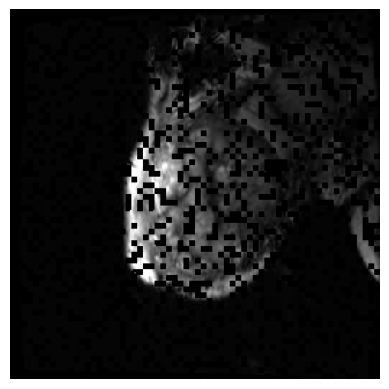

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images
mask_path = "/home/xzhon54/xinliuz/mnt/mae_eg/epoch275_global_mask.jpg"
scan_path = "/home/xzhon54/xinliuz/mnt/mae_eg/epoch275_global_scan.jpg"

mask_img = Image.open(mask_path).convert('L')  # convert mask to grayscale
scan_img = Image.open(scan_path).convert('L')  # assuming scan is also grayscale

# Convert to NumPy arrays
mask = np.array(mask_img)
scan = np.array(scan_img)

print("Mask unique values:", np.unique(mask))

# Normalize mask to binary (0 or 1)
mask = (mask > 20).astype(np.uint8)

# Apply mask
masked_scan = scan * mask

print("Scan min/max:", scan.min(), scan.max())
print("Mask unique values:", np.unique(mask))
print("Masked scan min/max:", masked_scan.min(), masked_scan.max())
# # Convert to image and save/show
masked_img = Image.fromarray(masked_scan)
masked_img.save("/home/xzhon54/xinliuz/mnt/mae_eg/masked_global.jpg")

plt.imshow(masked_scan, cmap='gray')
plt.axis('off')
plt.show()

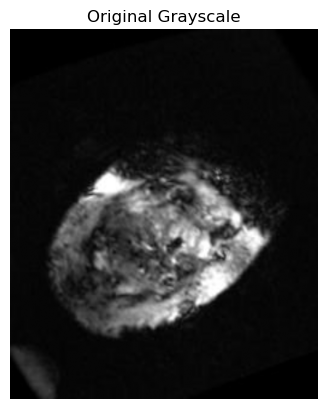

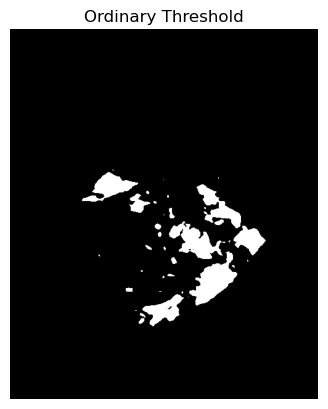

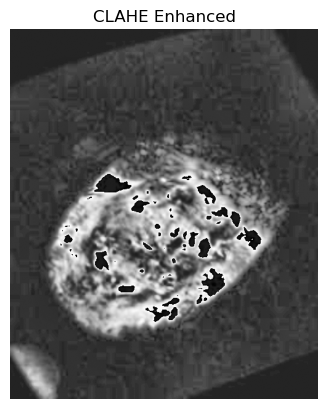

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
image_path = '/home/xzhon54/xinliuz/DIR/S2S2/Plac_MAE_B/web/images/epoch001_global1_img.jpg'

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")

# Resize for display purposes
image_resized = cv2.resize(image, (500, 600))

# Convert to grayscale
image_bw = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=5)
clahe_img = np.clip(clahe.apply(image_bw) + 30, 0, 255).astype(np.uint8)

# Apply binary threshold
_, threshold_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

# Display function using matplotlib
def display_image(title, image, cmap='gray'):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

# Show images
display_image("Original Grayscale", image_bw)
display_image("Ordinary Threshold", threshold_img)
display_image("CLAHE Enhanced", clahe_img)